# COGS 108 - Intrinsic Musical Features as Predictors of Song Popularity
Video Link: https://youtu.be/ke7rzhm7D98

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [ X ] NO - keep private

# Overview

Our project is focused on analyzing musical factors that contribute to the popularity of various music on Spotify. In order to do this, we found datasets that contain song characteristics such as danceability, loudness, etc., which we compared to the popularity and playlist selection of each song. We began by combining our datasets and then extracting only the columns we were interested in. After the data was normalized, we performed an EDA to determine the correlation between specific genres and their music features, which then is used to relate to their overall popularity. Finally, we leveraged stepwise regression and linear regression to analyze the split data to look for predictive factors that indicate a genre's popularity.

# Names

- Gihyeon Kown
- Janzen Molina
- Weston Monroe
- Victor Salcedo
- Rahat Sohan

<a id='research_question'></a>
# Research Question

What musical factors contribute to the average popularity of different music genres on Spotify?

<a id='background'></a>

## Background & Prior Work

Popular music has evolved tremendously over the last 40 years. With the advent of technology, the way music is created and distributed has evolved as well. One thing that has remained consistent is in the ever-evolving intricacies that exist in popular music. Genres, tempos, in addition to the length of time a song lasts are just some of the more noticeable ways that popular music distinguish themselves from others. We will be taking a closer look at the genre’s intricacies that may not be entirely noticeable by the human senses and how this combined with changing trends correlate with a song’s success. We will use datasets from the last 40 years to allow us to find even closer similarities between popular music and what leads to its rise to success. We will attempt to find out if successful popular music shares common traits or if it is entirely probabilistic.

A study conducted in 2022 sought to answer a related question of whether big data can predict what makes a song popular. L. Colley et al., Elucidation of the Relationship Between a Song's Spotify Descriptive Metrics and its Popularity on Various Platforms, 2022 IEEE 46th Annual Computers, Software, and Applications Conference (COMPSAC), Los Alamitos, CA, USA, 2022, pp. 241-249, doi: 10.1109/COMPSAC54236.2022.00042. https://ieeexplore.ieee.org/document/9842568. By taking a deep dive into the extrinsic and intrinsic factors that contribute to a song’s popularity and using acoustic descriptive features as variables to find a correlation with popularity metrics, a large-scale correlation-based analysis was generated. 

In another study completed in 2018 researchers found a way to predict the success of contemporary music in the top charts. Myra Interiano et al., Published:16 May 2018. https://doi.org/10.1098/rsos.171274. By analyzing more than 500,00 songs between 1985 and 2015 they found some interesting trends. For example happy and bright music was less of a predictor than sadness in a song. They used random forests  to predict the success of songs, first based on their acoustic features and then adding what they called a superstar variable This allowed for the quantification of musical intricacies in songs and popular trends. 

References (include links):
1) L. Colley et al., Elucidation of the Relationship Between a Song's Spotify Descriptive Metrics and its Popularity on Various Platforms, 2022 IEEE 46th Annual Computers, Software, and Applications Conference (COMPSAC), Los Alamitos, CA, USA, 2022, pp. 241-249, doi: 10.1109/COMPSAC54236.2022.00042. https://ieeexplore.ieee.org/document/9842568
2) Myra Interiano et al., Published:16 May 2018. https://doi.org/10.1098/rsos.171274

# Hypothesis


We predict that _no_ musical factors make music genres popular. While the inverse would be intriguing, prior work found no correlation between songs’ intrinsic qualities and their success, suggesting the same is true of genres.

# Dataset(s)

- Dataset Name:Spotify Multi-Genre Playlists Data
- Link to the dataset: https://www.kaggle.com/datasets/siropo/spotify-multigenre-playlists-data
- Number of observations: 26752 total

7 datasets, each containing a spotify genre: alternative, blues, hiphop, indie, metal, pop, and rock. The datasets contain song features like danceability, loudness, duration, etc, and the popularity and the playlist of each song.

We will be merging the 7 files into a single dataframe using pd.concat. Knowing that each csv file will have the same columns, we should be able to use the concat method without issue.

# Setup

In [1]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

import math
from copy import deepcopy

Reading all the 7 different genre datasets.

In [3]:
alternative = pd.read_csv('alternative_music_data.csv')
blues = pd.read_csv('blues_music_data.csv')
hiphop = pd.read_csv('hiphop_music_data.csv')
indie_alt = pd.read_csv('indie_alt_music_data.csv')
metal = pd.read_csv('metal_music_data.csv')
pop = pd.read_csv('pop_music_data.csv')
rock = pd.read_csv('rock_music_data.csv')

# Data Cleaning

First, we will replace all the 'Genres' column of each datas with respective genres.

In [4]:
datas = [alternative, blues, hiphop, indie_alt, metal, pop, rock]
genres = ['alternative', 'blues', 'hiphop', 'indie_alt', 'metal', 'pop', 'rock']

for i in range(len(datas)):
    datas[i].Genres = genres[i]

Then for each datas, we insert a 'genre_popularity' column holding that genre's mean popularity.

In [5]:
for i in range(len(datas)):
    mean_popularity = datas[i]['Popularity'].mean()
    datas[i].insert(3, 'genre_popularity', mean_popularity)

We now merge all the datas we have into a single dataframe called genre.

In [6]:
df = pd.DataFrame()
for data in datas:
    df = pd.concat([df, data], axis=0)
df.to_csv('genre.csv', index=False)

df.head()

,Artist Name,Track Name,Popularity,genre_popularity,Genres,Playlist,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature
0,James,Laid,66,46.292593,alternative,Alternative 90s,0.457,0.909,0,-9.451,...,0.000276,0.1350,0.755,115.998,2CdS3DRqWR5LAhy4hM5X9W,spotify:track:2CdS3DRqWR5LAhy4hM5X9W,https://api.spotify.com/v1/tracks/2CdS3DRqWR5L...,https://api.spotify.com/v1/audio-analysis/2CdS...,156667,4
1,grandson,In Over My Head,60,46.292593,alternative,Alternative Beats,0.582,0.817,0,-6.475,...,0.015800,0.5750,0.622,155.124,3r0mb1tzAcCNoA8YRXuIhZ,spotify:track:3r0mb1tzAcCNoA8YRXuIhZ,https://api.spotify.com/v1/tracks/3r0mb1tzAcCN...,https://api.spotify.com/v1/audio-analysis/3r0m...,198366,4
2,Foals,On The Luna,51,46.292593,alternative,Alternative 10s,0.525,0.976,0,-2.023,...,0.000392,0.0804,0.855,138.984,0Sfj5fPqZzCq9o3f1NNphz,spotify:track:0Sfj5fPqZzCq9o3f1NNphz,https://api.spotify.com/v1/tracks/0Sfj5fPqZzCq...,https://api.spotify.com/v1/audio-analysis/0Sfj...,192695,4
3,Longpigs,She Said,47,46.292593,alternative,Alternative 90s,0.210,0.870,5,-5.985,...,0.000488,0.1880,0.517,168.352,5J7l2wE9wxqod7xIP0jyAB,spotify:track:5J7l2wE9wxqod7xIP0jyAB,https://api.spotify.com/v1/tracks/5J7l2wE9wxqo...,https://api.spotify.com/v1/audio-analysis/5J7l...,264067,4
4,Beastie Boys,Sure Shot,57,46.292593,alternative,Alternative 90s,0.692,0.799,1,-7.924,...,0.000000,0.3010,0.549,97.978,21REQ1bCUWphT2QK3bLWYQ,spotify:track:21REQ1bCUWphT2QK3bLWYQ,https://api.spotify.com/v1/tracks/21REQ1bCUWph...,https://api.spotify.com/v1/audio-analysis/21RE...,199667,4


Next, we remove unnecessary columns (id, uri, track_href, analysis_url).

In [7]:
df = df.drop(columns=['id','uri','track_href', 'analysis_url'])
df.head()

,Artist Name,Track Name,Popularity,genre_popularity,Genres,Playlist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,James,Laid,66,46.292593,alternative,Alternative 90s,0.457,0.909,0,-9.451,1,0.0317,0.001600,0.000276,0.1350,0.755,115.998,156667,4
1,grandson,In Over My Head,60,46.292593,alternative,Alternative Beats,0.582,0.817,0,-6.475,1,0.0399,0.001700,0.015800,0.5750,0.622,155.124,198366,4
2,Foals,On The Luna,51,46.292593,alternative,Alternative 10s,0.525,0.976,0,-2.023,1,0.0479,0.066200,0.000392,0.0804,0.855,138.984,192695,4
3,Longpigs,She Said,47,46.292593,alternative,Alternative 90s,0.210,0.870,5,-5.985,1,0.0606,0.000147,0.000488,0.1880,0.517,168.352,264067,4
4,Beastie Boys,Sure Shot,57,46.292593,alternative,Alternative 90s,0.692,0.799,1,-7.924,1,0.1640,0.388000,0.000000,0.3010,0.549,97.978,199667,4


Then we standardize our musical feature values.

In [8]:
scaler = preprocessing.StandardScaler()
df.iloc[:, 6:] = scaler.fit_transform(df.iloc[:, 6:])
df

,Artist Name,Track Name,Popularity,genre_popularity,Genres,Playlist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,James,Laid,66,46.292593,alternative,Alternative 90s,-0.565104,0.996736,-1.485873,-0.670053,0.777688,-0.609420,-0.698272,-0.448311,-0.405223,1.118896,-0.265402,-0.942754,0.190121
1,grandson,In Over My Head,60,46.292593,alternative,Alternative Beats,0.185641,0.560178,-1.485873,0.228410,0.777688,-0.516031,-0.697895,-0.385245,2.411154,0.549254,1.067023,-0.418600,0.190121
2,Foals,On The Luna,51,46.292593,alternative,Alternative 10s,-0.156699,1.314664,-1.485873,1.572482,0.777688,-0.424920,-0.454873,-0.447839,-0.754710,1.547198,0.517380,-0.489885,0.190121
3,Longpigs,She Said,47,46.292593,alternative,Alternative 90s,-2.048574,0.811673,-0.084001,0.376342,0.777688,-0.280281,-0.703747,-0.447449,-0.065978,0.099537,1.517499,0.407256,0.190121
4,Beastie Boys,Sure Shot,57,46.292593,alternative,Alternative 90s,0.846296,0.474765,-1.205499,-0.209047,0.777688,0.897328,0.757604,-0.449432,0.657319,0.236594,-0.879068,-0.402247,0.190121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8742,blink-182,I Miss You,0,48.797645,rock,00s Rock Anthems,0.606058,0.318173,1.598245,0.226599,0.777688,-0.577531,-0.701433,-0.449406,-0.796316,0.630632,-0.469288,-0.048454,0.190121
8743,Beloved,Failure On My Lips,37,48.797645,rock,2000s Screamo,-2.174699,1.295683,-0.925125,1.327638,-1.285862,0.089857,-0.704261,-0.411245,0.183655,-1.198217,1.643399,0.561439,0.190121
8744,Saint Louis,Carry Me Away,35,48.797645,rock,Rocktronic,-1.592122,0.868616,0.476748,1.470136,0.777688,-0.526281,-0.687911,-0.284496,-0.584447,-1.927187,0.537812,-0.609060,0.190121
8745,The Smashing Pumpkins,Disarm - Remastered,64,48.797645,rock,Rocktail Hour,-0.144687,-1.333154,-0.364376,-0.897688,-1.285862,-0.654975,-0.169274,2.723349,-0.379620,-1.185368,0.194984,-0.436965,0.190121


Next we can standardize the column names by making every title lowercase and replacing space characters with underscores.

In [9]:
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace(' ', '_')
df

,artist_name,track_name,popularity,genre_popularity,genres,playlist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,James,Laid,66,46.292593,alternative,Alternative 90s,-0.565104,0.996736,-1.485873,-0.670053,0.777688,-0.609420,-0.698272,-0.448311,-0.405223,1.118896,-0.265402,-0.942754,0.190121
1,grandson,In Over My Head,60,46.292593,alternative,Alternative Beats,0.185641,0.560178,-1.485873,0.228410,0.777688,-0.516031,-0.697895,-0.385245,2.411154,0.549254,1.067023,-0.418600,0.190121
2,Foals,On The Luna,51,46.292593,alternative,Alternative 10s,-0.156699,1.314664,-1.485873,1.572482,0.777688,-0.424920,-0.454873,-0.447839,-0.754710,1.547198,0.517380,-0.489885,0.190121
3,Longpigs,She Said,47,46.292593,alternative,Alternative 90s,-2.048574,0.811673,-0.084001,0.376342,0.777688,-0.280281,-0.703747,-0.447449,-0.065978,0.099537,1.517499,0.407256,0.190121
4,Beastie Boys,Sure Shot,57,46.292593,alternative,Alternative 90s,0.846296,0.474765,-1.205499,-0.209047,0.777688,0.897328,0.757604,-0.449432,0.657319,0.236594,-0.879068,-0.402247,0.190121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8742,blink-182,I Miss You,0,48.797645,rock,00s Rock Anthems,0.606058,0.318173,1.598245,0.226599,0.777688,-0.577531,-0.701433,-0.449406,-0.796316,0.630632,-0.469288,-0.048454,0.190121
8743,Beloved,Failure On My Lips,37,48.797645,rock,2000s Screamo,-2.174699,1.295683,-0.925125,1.327638,-1.285862,0.089857,-0.704261,-0.411245,0.183655,-1.198217,1.643399,0.561439,0.190121
8744,Saint Louis,Carry Me Away,35,48.797645,rock,Rocktronic,-1.592122,0.868616,0.476748,1.470136,0.777688,-0.526281,-0.687911,-0.284496,-0.584447,-1.927187,0.537812,-0.609060,0.190121
8745,The Smashing Pumpkins,Disarm - Remastered,64,48.797645,rock,Rocktail Hour,-0.144687,-1.333154,-0.364376,-0.897688,-1.285862,-0.654975,-0.169274,2.723349,-0.379620,-1.185368,0.194984,-0.436965,0.190121


We can also try to drop any observations that have missing values using dropna. However, after running the dropna method, we can see that there were no observations dropped, meaning that every observation has no missing values.

In [10]:
df = df.dropna(how='all')
df

,artist_name,track_name,popularity,genre_popularity,genres,playlist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,James,Laid,66,46.292593,alternative,Alternative 90s,-0.565104,0.996736,-1.485873,-0.670053,0.777688,-0.609420,-0.698272,-0.448311,-0.405223,1.118896,-0.265402,-0.942754,0.190121
1,grandson,In Over My Head,60,46.292593,alternative,Alternative Beats,0.185641,0.560178,-1.485873,0.228410,0.777688,-0.516031,-0.697895,-0.385245,2.411154,0.549254,1.067023,-0.418600,0.190121
2,Foals,On The Luna,51,46.292593,alternative,Alternative 10s,-0.156699,1.314664,-1.485873,1.572482,0.777688,-0.424920,-0.454873,-0.447839,-0.754710,1.547198,0.517380,-0.489885,0.190121
3,Longpigs,She Said,47,46.292593,alternative,Alternative 90s,-2.048574,0.811673,-0.084001,0.376342,0.777688,-0.280281,-0.703747,-0.447449,-0.065978,0.099537,1.517499,0.407256,0.190121
4,Beastie Boys,Sure Shot,57,46.292593,alternative,Alternative 90s,0.846296,0.474765,-1.205499,-0.209047,0.777688,0.897328,0.757604,-0.449432,0.657319,0.236594,-0.879068,-0.402247,0.190121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8742,blink-182,I Miss You,0,48.797645,rock,00s Rock Anthems,0.606058,0.318173,1.598245,0.226599,0.777688,-0.577531,-0.701433,-0.449406,-0.796316,0.630632,-0.469288,-0.048454,0.190121
8743,Beloved,Failure On My Lips,37,48.797645,rock,2000s Screamo,-2.174699,1.295683,-0.925125,1.327638,-1.285862,0.089857,-0.704261,-0.411245,0.183655,-1.198217,1.643399,0.561439,0.190121
8744,Saint Louis,Carry Me Away,35,48.797645,rock,Rocktronic,-1.592122,0.868616,0.476748,1.470136,0.777688,-0.526281,-0.687911,-0.284496,-0.584447,-1.927187,0.537812,-0.609060,0.190121
8745,The Smashing Pumpkins,Disarm - Remastered,64,48.797645,rock,Rocktail Hour,-0.144687,-1.333154,-0.364376,-0.897688,-1.285862,-0.654975,-0.169274,2.723349,-0.379620,-1.185368,0.194984,-0.436965,0.190121


We can print out the total genres that the songs in the dataset are associated with using the value_counts method.

In [11]:
df.genres.value_counts()

rock           8747
indie_alt      4338
pop            3831
metal          3045
hiphop         2581
alternative    2160
blues          2050
Name: genres, dtype: int64

# Data Analysis & Results

## EDA

To begin our Data Analysis let's take a look at the key statistics in popularity in addition to our musical features to see how the data is distributed.

In [12]:
df.describe()

,popularity,genre_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,26752.000000,26752.000000,2.675200e+04,2.675200e+04,2.675200e+04,2.675200e+04,2.675200e+04,26752.000000,2.675200e+04,26752.000000,2.675200e+04,2.675200e+04,2.675200e+04,2.675200e+04,2.675200e+04
mean,46.603544,46.603544,-4.462140e-16,-8.010604e-16,1.992027e-17,6.799452e-17,1.088975e-16,0.000000,1.274897e-17,0.000000,-1.243025e-16,1.827353e-16,1.997339e-16,9.349247e-17,1.014606e-16
std,18.890180,5.105793,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019,1.000019e+00,1.000019,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00
min,0.000000,33.831707,-3.309825e+00,-3.316549e+00,-1.485873e+00,-8.330535e+00,-1.285862e+00,-0.970447,-7.043007e-01,-0.449432,-1.193169e+00,-2.114783e+00,-4.215681e+00,-2.738669e+00,-1.176318e+01
25%,34.000000,42.803284,-6.732107e-01,-6.688271e-01,-9.251246e-01,-4.741178e-01,-1.285862e+00,-0.562725,-6.953710e-01,-0.449432,-6.465358e-01,-7.741986e-01,-8.096306e-01,-5.704452e-01,1.901214e-01
50%,46.000000,48.797645,-6.549817e-03,1.473462e-01,-8.400124e-02,1.909741e-01,7.776883e-01,-0.394170,-5.368222e-01,-0.448368,-4.116243e-01,-1.610420e-02,-6.083542e-02,-1.767174e-01,1.901214e-01
75%,60.000000,48.797645,6.961468e-01,8.448897e-01,1.037497e+00,6.873024e-01,7.776883e-01,0.069357,3.695207e-01,-0.313746,4.396896e-01,7.676883e-01,6.668458e-01,3.338478e-01,1.901214e-01
max,100.000000,53.173062,2.630064e+00,1.428549e+00,1.598245e+00,2.592309e+00,7.776883e-01,9.962872,3.048422e+00,3.596778,5.080311e+00,2.108273e+00,4.278859e+00,1.671128e+01,3.178446e+00


It's important to note that before standardizing, the values range between 0 and 1 for the musical features: danceability, energey, key, loudness, mode, speechiness, accousticness, instrumentalness, liveness and valence. Tempo, duration_ms and time_signature use values that are unique to their features.

In the next section we take a closer look at specific genres and their musical feature means. This data will play a key role in determining what makes a song more popular within its specific genre.

In [13]:
df_features = df[['genres','danceability','energy','key',
                  'loudness','mode','speechiness','acousticness',
                  'instrumentalness','liveness','valence','tempo',
                  'duration_ms','time_signature']].groupby('genres').mean()
       
df_features.sort_values(by='genres',ascending=False)
df_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
genres,,,,,,,,,,,,,
alternative,-0.084913,-0.028009,0.015687,-0.118409,0.073597,-0.201058,-0.033650,0.218101,-0.062223,0.085319,0.077568,-0.097885,0.008885
blues,0.079201,-0.597820,0.037312,-0.577795,0.092187,-0.261989,0.799854,-0.096602,0.060059,0.513777,-0.074473,0.161748,-0.318623
hiphop,1.096966,-0.285928,0.005510,-0.043877,-0.184929,1.713745,0.015892,-0.355998,-0.006923,0.190708,-0.167878,-0.341006,0.164649
indie_alt,0.028537,-0.175334,0.023482,-0.248942,0.068432,-0.209840,0.115165,0.437275,-0.067459,0.001704,-0.014156,-0.041984,0.015837
metal,-0.814372,0.858935,-0.015680,0.422363,-0.086360,0.047284,-0.604520,0.362431,0.166870,-0.715147,0.141895,0.474330,-0.101351
pop,0.547467,-0.423693,-0.021135,0.078410,-0.170866,-0.103863,0.454423,-0.347936,-0.175290,0.112249,-0.142398,-0.354406,0.045034
rock,-0.291711,0.204907,-0.011175,0.119688,0.085749,-0.261530,-0.229536,-0.116816,0.055471,0.001196,0.067826,0.097806,0.031600


The above data table shows the mean distribution of musical features split up by genre. Further examination will attempt to provide key insight into what combinations of musical features makes a song more successful.

Mean Musical Factors Distribution Across all Genres


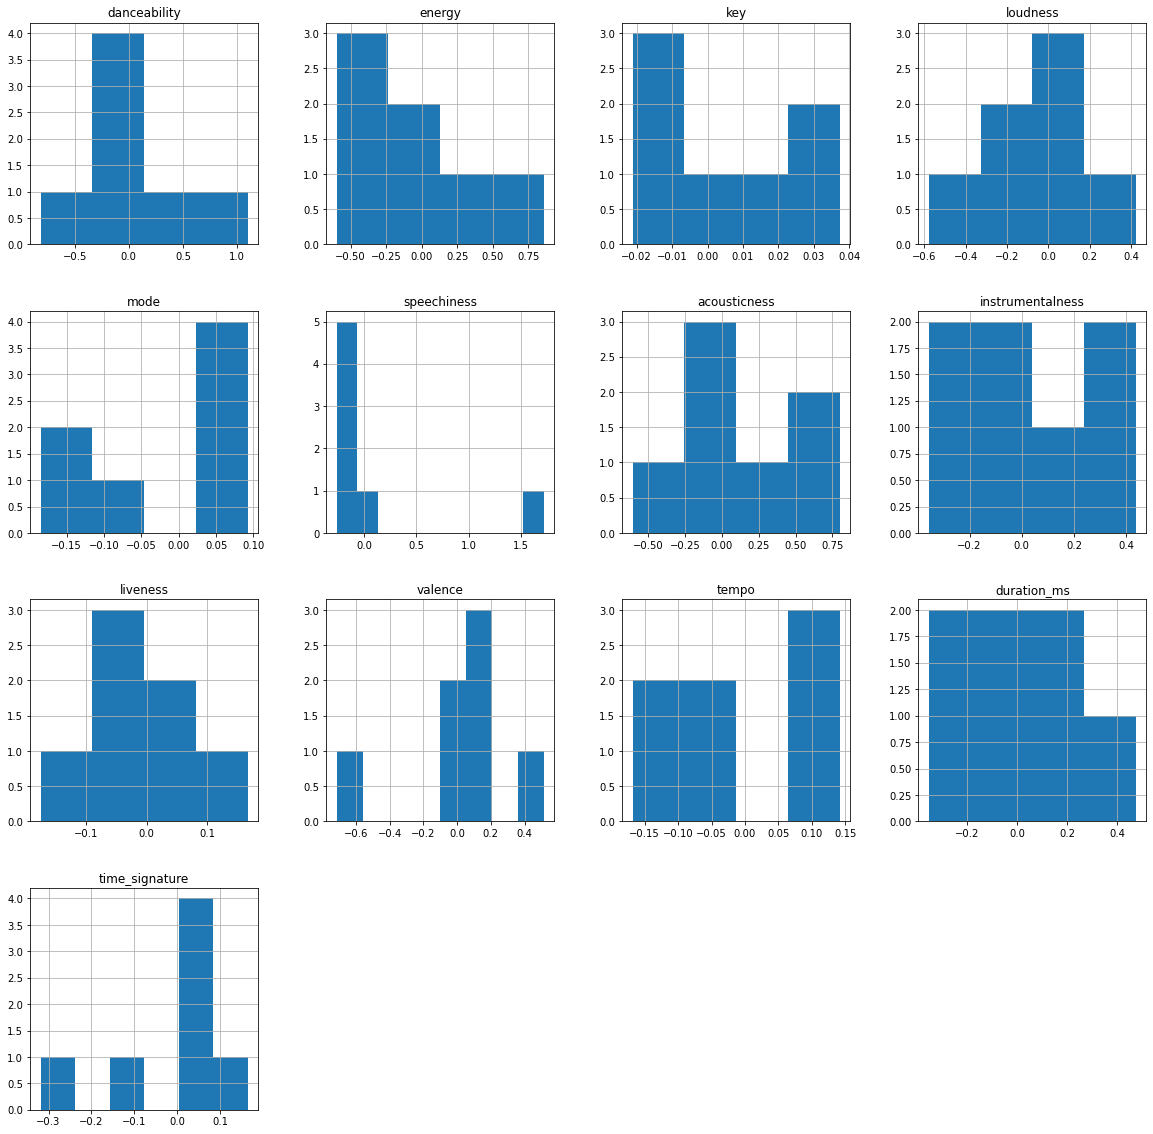

In [14]:
print("Mean Musical Factors Distribution Across all Genres")
df_features.hist(bins='auto',figsize = (20,20));

This reveals that the average genre loudness and liveness are approximately nornally distributed. Dancablility, energy, and duration look unimodal while key, mode, instrumentalness, and tempo look bimodal. Further, speechiness, varience, and time signature apprear to have outliers. The average genre features have diverse distributions overall.

In the next section we take a closer look at specific genres and their mean popularity.

In [15]:
df_popularity = df[['popularity','genres']].groupby('genres').mean()
df_popularity.columns = ['mean_popularity']
df_popularity = df_popularity.sort_values(by='mean_popularity', ascending=False)
df_popularity

,mean_popularity
genres,
pop,53.173062
hiphop,50.826424
rock,48.797645
alternative,46.292593
metal,42.803284
indie_alt,42.723144
blues,33.831707


We can see that pop has the highest mean_popularity. Pop as the highest mean_popularity makes sense because it ecompasses mutliple genres; however, do the various musical factors determine higher mean_popularity?

Next, we'll take a look at the distribution of musical factors in all genres combined and compare that to overall mean_popularity of all genres combined.

Popularity Distribution vs Musical Factors Distribution Across all Genres


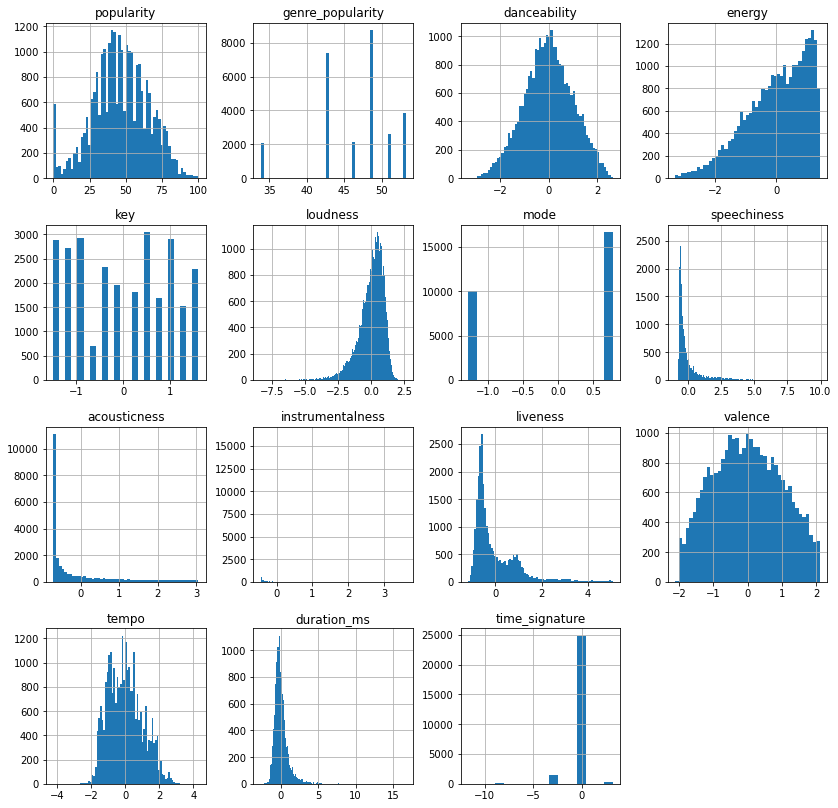

In [16]:
print("Popularity Distribution vs Musical Factors Distribution Across all Genres")
df.hist(bins='auto',figsize = (14,14));

We see that popularity, danceability, loudness, valence, tempo, and duration are roughly normal distributions. Intriguingly, popularity spikes at 0 and is very jagged. The former may be because many songs do not get popular, while the latter may be due to the coarseness of Spotify's popularity algorithm. Additionally, speechiness, acousticness, and liveness look exponential, with liveness being bimodal.

Based on the above histograms, popularity distribution is similar to danceability, valence, and tempo. Is it possible that danceability, valence and tempo are the keys to predicting a song's success?

Now we display the most interesting scatterplots of popularity verses musical features for the top three genres: pop, hiphop, and rock.

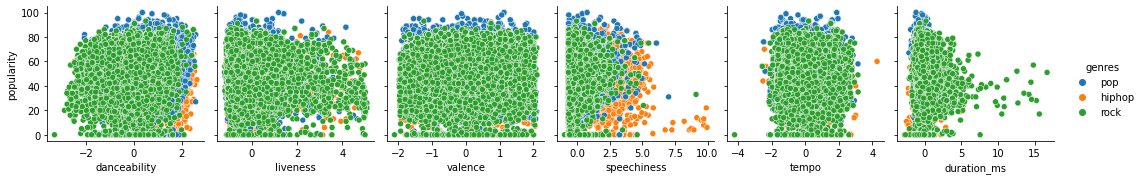

In [17]:
top_genres = list(df_popularity.index)
df_top3 = df.loc[(df['genres'] == 'pop') | (df['genres'] == 'hiphop') 
               | (df['genres'] == 'rock')]
interesting_vars = ['danceability', 'liveness', 'valence', 'speechiness', 
                    'tempo', 'duration_ms']
pairplot_top3 = sns.pairplot(df_top3, 
                             hue='genres',
                             hue_order=top_genres[0:3], 
                             x_vars = interesting_vars, 
                             y_vars=['popularity'])

This suggests valence and tempo are uncorrelated with popularity. However, danceability seems to have a very weak positive correlation with it, and liveness, speechiness, and duration appear to be very weakly negatively correlated with the variable.

We can make similar scatterplots of mean genre popularity verses musical features for all seven genres.

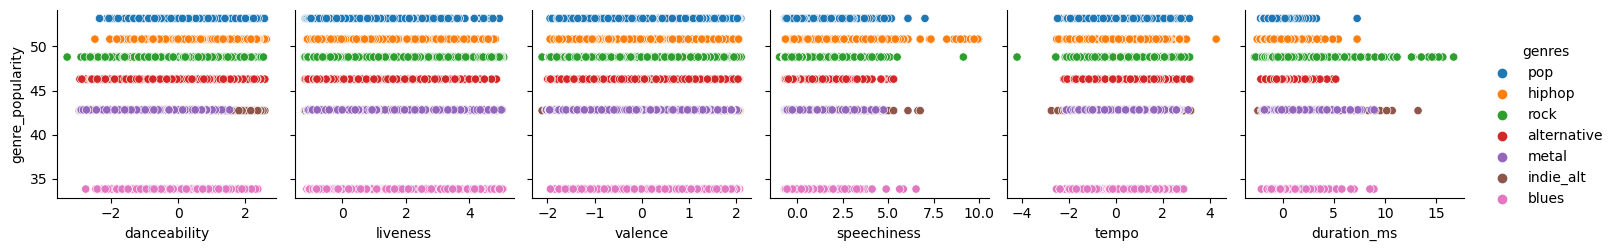

In [79]:
pairplot_top3 = sns.pairplot(df, 
                             hue='genres',
                             hue_order=top_genres, 
                             x_vars = interesting_vars, 
                             y_vars=['genre_popularity'])

The scatterplots for speechiness and duration reveal interesting groupings, but the other plots are monotonous.

Next we use a heat map to plot and check for any correlations that may exist between all of the musical variables. If the correlation is too high, then we may have to remove them from our data set.

/tmp/ipykernel_1231/2126815437.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),mask=np.triu(np.ones_like(df.corr())));


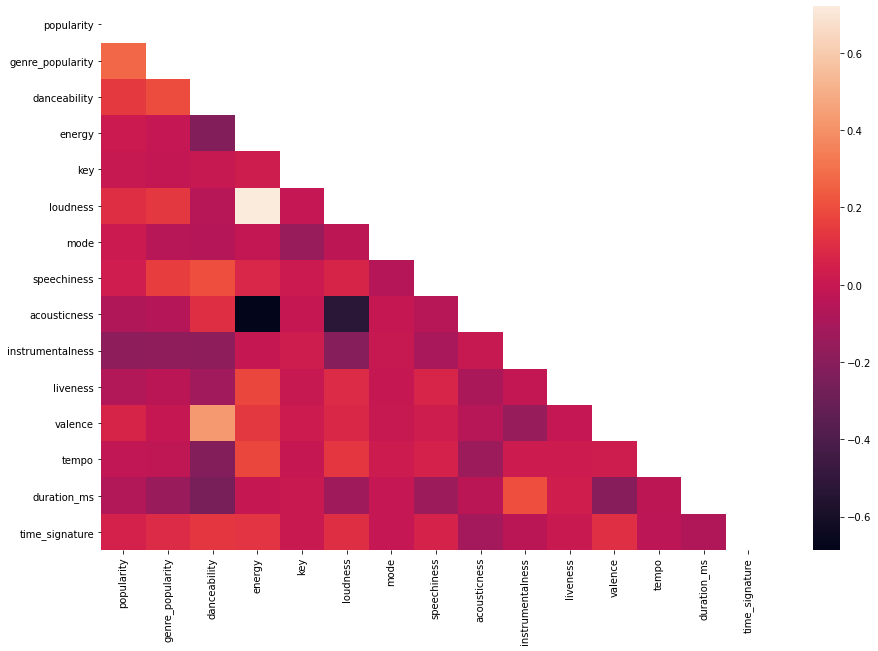

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),mask=np.triu(np.ones_like(df.corr())));

In the heatmap above, we can quickly see where there is a higher correlation value by looking for black or white squares. This heat map shows high correlation between loudness and energy; acousticness and energy; and acousticness and loudness. However, there is low correlation between popularity and each feature. We must determine whether the high-correlation features are too high to remain in our data set. The following shows that while these features have a high correlation we can still keep them and use within our data sets.

In [19]:
df[["acousticness", "energy", "loudness"]].corr()

,acousticness,energy,loudness
acousticness,1.000000,-0.686252,-0.532320
energy,-0.686252,1.000000,0.720304
loudness,-0.532320,0.720304,1.000000


After review of the correlation values of acousticness, energy and loudness; it appears that the correlation is not high enough to be removed. Now that we have our data prepared, we will continue onto the next area. In the next area we will use various machine learning algorithms to compare against our baseline model. Then we will select the machine learning algorithm that has the best predictive model. 

## Analysis

First, we split the data:
- Training set 60% of the data randomly mixed across genres
- Validation set 20% of the data randomly mixed across genres
- Test set 20% of the data randomly mixed across genres

In [20]:
# Selects the features and target
X = df.iloc[:, 6:]
Y = df['genre_popularity']

trainvalid_X, test_X,\
    trainvalid_Y, test_Y = train_test_split(X, Y,
                                            test_size=0.2, random_state=10)
train_X, valid_X,\
    train_Y, valid_Y = train_test_split(trainvalid_X, trainvalid_Y, 
                                        test_size=0.25, random_state=10)
print(train_X.shape, valid_X.shape, test_X.shape)

(16050, 13) (5351, 13) (5351, 13)


Adapted from Fleischer, Jason. Data Science in Practice. _COGS108_, Spring 2023, https://github.com/COGS108/Lectures-Sp23/blob/main/07_03_text_ml.ipynb.

Then, we select musical features by performing stepwise regression on the validation set. This approach finds the most predictive factors automagically. We repeated this for different values of `k_features` and found that, on the test data, `k_features=13` yields the lowest root mean squared error (RMSE); see **Table 1** below.

In [21]:
selector = sfs(LinearRegression(), k_features=13, cv=None)
selector = selector.fit(valid_X, valid_Y)

selected_columns = list(selector.k_feature_idx_)
train2_X = train_X.iloc[:, selected_columns]
test2_X = test_X.iloc[:, selected_columns]
print(X.columns[selected_columns])

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')


Next, we fit a linear regression model and predict on the training and test set. We start with this model since it is the simplest and some of the correlations looked roughly linear.

In [22]:
linreg = LinearRegression()
linreg.fit(train2_X, train_Y)
linreg_train = deepcopy(linreg)

pred_train_Y = linreg_train.predict(train2_X)
pred_test_Y = linreg.predict(test2_X)

Adapted from vinayedula. "Stepwise Regression in Python." _Geeks for Geeks_, https://www.geeksforgeeks.org/stepwise-regression-in-python/. Accesed 12 June 2023.

Last, we assess the accuracy on the training and test set by examining the RMSE. We also show the coefficients and the coefficient of determination (R^2).

In [23]:
print('Training Set')
print('\tCoefficients\t', linreg_train.coef_)
mse = mean_squared_error(train_Y, pred_train_Y)
print('\tRMSE\t\t%.4f' % math.sqrt(mse))
print('\tR^2\t\t%.4f' % r2_score(train_Y, pred_train_Y))

print('Test Set')
print('\tCoefficients\t', linreg.coef_)
mse = mean_squared_error(test_Y, pred_test_Y)
print('\tRMSE\t\t%.4f' % math.sqrt(mse))
print('\tR^2\t\t%.4f' % r2_score(test_Y, pred_test_Y))


Training Set
	Coefficients	 [ 0.76657612 -0.87145711 -0.04710381  0.89095028 -0.18192773  0.53702494
 -0.51831213 -0.54428521 -0.15056484 -0.4889291  -0.02755659 -0.31795159
  0.28355207]
	RMSE		4.7974
	R^2		0.1147
Test Set
	Coefficients	 [ 0.76657612 -0.87145711 -0.04710381  0.89095028 -0.18192773  0.53702494
 -0.51831213 -0.54428521 -0.15056484 -0.4889291  -0.02755659 -0.31795159
  0.28355207]
	RMSE		4.7508
	R^2		0.1076


Adapted from Grobler, Jaques. "Linear Regression Example." _scikit-learn_, https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html. Accessed 12 June 2023.

**Table 1:** Test Set Accuracy

| `k_features` | RMSE | R^2 |
|----|--------|--------|
|  1 | 4.9312 | 0.0385 |
|  5 | 4.7921 | 0.0920 |
| 10 | 4.7516 | 0.1073 |
| 13 | 4.7508 | 0.1076 |

Remarkably, including all the numerical song qualities gives both the smallest error and the largest correlation. An R^2 score of 1 indicates a perfect fit. Our highest score was about 0.1, implying that, in linear regression, musical factors predict genre popularity poorly.

Now, we will switch gears to discuss ethics and privacy.

# Ethics & Privacy

The datasets we aim to analyze do not contain sensitive data regarding the users, rather metric information containing steaming values and song attributes. These are commonly available to the public and contain no risk for data privacy breaches.

The datasets we intend to discuss may contain potential biases that may effect our result and the outcome of our research question. This can include the platform(s) we choose to analyze data from, which leaves out other popular sources of streaming music. This can alter the results and bias the data in favor of a trend that is not found on other platforms. Similarly, when choosing genres of music we may bias the data by picking popular genres that we are familiar with.

In order to reduce biases as much as possible, we will search through several datasets with these things in mind to ensure we factor in all relevant data. Moreover, we will consider using multiple music streaming platforms to get a more accurate representation of streaming trends and algorithms. The data collection models are fully consensual and do not require active user participation, rather it is collected from their respective apps and holds no sensitive information about the user. For that reason, there are very little ethical concerns when working with our targeted datasets, and analyzing them to answer our research question.

# Conclusion & Discussion

Based on our analysis we have come to the conclusion that there is no correlation between the intrinsic features of music and its overall popularity. In layman’s terms, there is no one specific musical feature or combination of musical features that will successfully predict a songs’ overall popularity. We believe that there may be more of a correlation between a song’s popularity and its extrinsic features. Additionally, further future plans for research such as: demographic factors, social media promotion, and artist popularity on google search trends may provide us with the crucial insight necessary to prove this correlation. The popularity of music is an ever-evolving trend that changes constantly. Much of this change has to do with technology and our ability to access enormous amounts of new music in real-time. However, there is a tried-and-true method that involves the marketing and promotion of music that seems to be a bigger factor in its overall popularity.

# Team Contributions

- Gihyeon K and Rahat S: Find datasets and data wrangle
- Janzen M and Weston M: Edit source code and analyze data
- Victor S: Draft the code to visualize data